In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f90a9a6a4d10f8dbb166b598dac8f769


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | marsh harbour
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | loa janan
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | jasper
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | yumen
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | torbay
Processing Record

Processing Record 37 of Set 4 | solnechnyy
Processing Record 38 of Set 4 | show low
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | ranong
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | burkhala
City not found. Skipping...
Processing Record 43 of Set 4 | camacha
Processing Record 44 of Set 4 | nizhnyaya maktama
Processing Record 45 of Set 4 | maningrida
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | warrington
Processing Record 49 of Set 4 | salinas
Processing Record 50 of Set 4 | bolonchen
City not found. Skipping...
Processing Record 1 of Set 5 | mazagao
Processing Record 2 of Set 5 | sept-iles
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | dover
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Proce

Processing Record 21 of Set 8 | sainte-rose
Processing Record 22 of Set 8 | uncia
Processing Record 23 of Set 8 | marsabit
Processing Record 24 of Set 8 | goderich
Processing Record 25 of Set 8 | provideniya
Processing Record 26 of Set 8 | nouadhibou
Processing Record 27 of Set 8 | callaway
Processing Record 28 of Set 8 | imeni poliny osipenko
Processing Record 29 of Set 8 | mangrol
Processing Record 30 of Set 8 | kolobrzeg
Processing Record 31 of Set 8 | vardo
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | yar-sale
Processing Record 34 of Set 8 | rio gallegos
Processing Record 35 of Set 8 | chuguyevka
Processing Record 36 of Set 8 | finschhafen
Processing Record 37 of Set 8 | kogon
Processing Record 38 of Set 8 | torbat-e jam
Processing Record 39 of Set 8 | sabaudia
Processing Record 40 of Set 8 | labytnangi
Processing Record 41 of Set 8 | visby
Processing Record 42 of Set 8 | chingirlau
Processing Record 43 of Set 8 | road town
Processing Record 44 of Set 8 | p

Processing Record 11 of Set 12 | magan
Processing Record 12 of Set 12 | belogradcik
City not found. Skipping...
Processing Record 13 of Set 12 | tolaga bay
Processing Record 14 of Set 12 | nyimba
Processing Record 15 of Set 12 | nhulunbuy
Processing Record 16 of Set 12 | san jose
Processing Record 17 of Set 12 | coquimbo
Processing Record 18 of Set 12 | arman
Processing Record 19 of Set 12 | makanya
Processing Record 20 of Set 12 | atbasar
Processing Record 21 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 22 of Set 12 | san nicolas
Processing Record 23 of Set 12 | nurota
Processing Record 24 of Set 12 | watsa
Processing Record 25 of Set 12 | hokitika
Processing Record 26 of Set 12 | takaka
Processing Record 27 of Set 12 | paramonga
Processing Record 28 of Set 12 | bozhou
Processing Record 29 of Set 12 | houma
Processing Record 30 of Set 12 | madang
Processing Record 31 of Set 12 | berdigestyakh
Processing Record 32 of Set 12 | kiunga
Processing Record 33 of Set 

In [10]:
len(city_data)

553

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,57.99,78,6,12.03,ZA,2021-03-27 22:29:25
1,Thompson,55.7435,-97.8558,23.00,54,75,6.91,CA,2021-03-27 22:27:24
2,Arraial Do Cabo,-22.9661,-42.0278,80.60,69,0,10.36,BR,2021-03-27 22:29:10
3,Ilulissat,69.2167,-51.1000,-11.20,49,3,4.61,GL,2021-03-27 22:29:05
4,Marsh Harbour,26.5412,-77.0636,76.64,69,0,14.45,BS,2021-03-27 22:29:55
5,Yellowknife,62.4560,-114.3525,27.00,50,20,14.97,CA,2021-03-27 22:25:26
6,Nikolskoye,59.7035,30.7861,39.99,70,0,6.71,RU,2021-03-27 22:31:20
7,Loa Janan,-0.5830,117.0950,73.65,97,96,1.30,ID,2021-03-27 22:31:20
8,Tasiilaq,65.6145,-37.6368,19.40,45,90,19.57,GL,2021-03-27 22:29:24
9,Cape Town,-33.9258,18.4232,63.00,63,0,6.91,ZA,2021-03-27 22:29:11


In [12]:
# Reorder columns in city_data_df DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-03-27 22:29:25,-34.4187,19.2345,57.99,78,6,12.03
1,Thompson,CA,2021-03-27 22:27:24,55.7435,-97.8558,23.00,54,75,6.91
2,Arraial Do Cabo,BR,2021-03-27 22:29:10,-22.9661,-42.0278,80.60,69,0,10.36
3,Ilulissat,GL,2021-03-27 22:29:05,69.2167,-51.1000,-11.20,49,3,4.61
4,Marsh Harbour,BS,2021-03-27 22:29:55,26.5412,-77.0636,76.64,69,0,14.45
5,Yellowknife,CA,2021-03-27 22:25:26,62.4560,-114.3525,27.00,50,20,14.97
6,Nikolskoye,RU,2021-03-27 22:31:20,59.7035,30.7861,39.99,70,0,6.71
7,Loa Janan,ID,2021-03-27 22:31:20,-0.5830,117.0950,73.65,97,96,1.30
8,Tasiilaq,GL,2021-03-27 22:29:24,65.6145,-37.6368,19.40,45,90,19.57
9,Cape Town,ZA,2021-03-27 22:29:11,-33.9258,18.4232,63.00,63,0,6.91


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

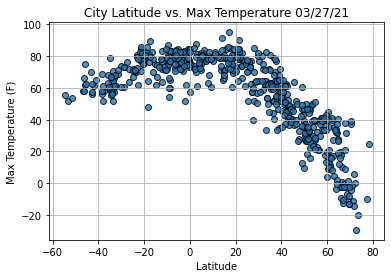

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

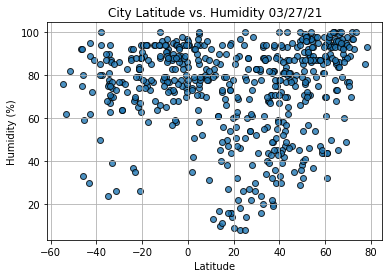

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

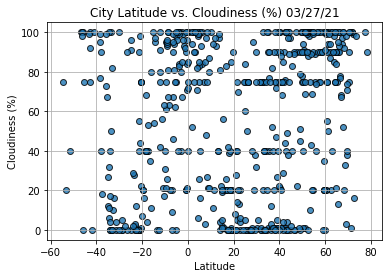

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

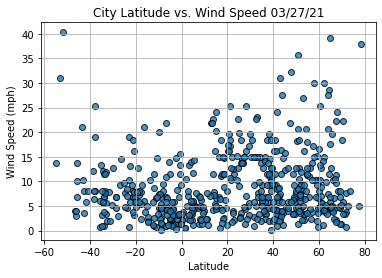

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

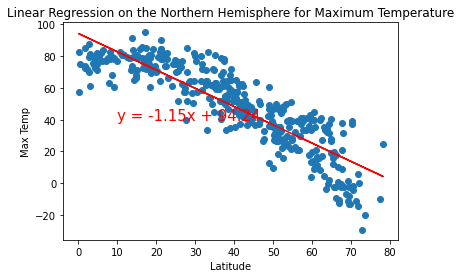

<Figure size 432x288 with 0 Axes>

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
plt.savefig("weather_data/temp_north.png")

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.877


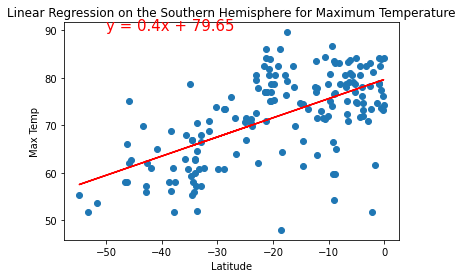

<Figure size 432x288 with 0 Axes>

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))
plt.savefig("weather_data/temp_south.png")

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.610


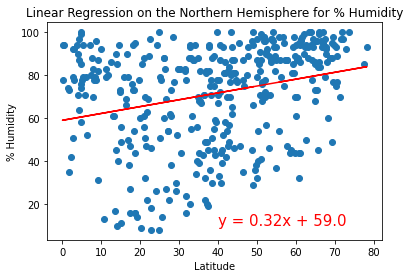

<Figure size 432x288 with 0 Axes>

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))
plt.savefig("weather_data/humid_north.png")

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.271


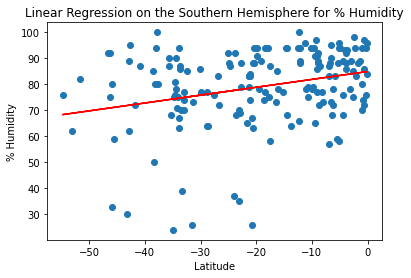

<Figure size 432x288 with 0 Axes>

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))
plt.savefig("weather_data/humid_south.png")

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.282


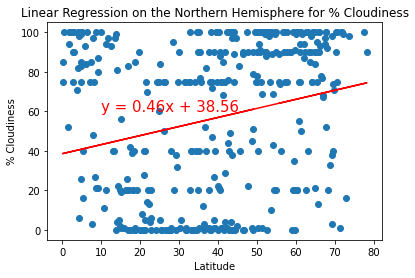

<Figure size 432x288 with 0 Axes>

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))
plt.savefig("weather_data/cloud_north.png")

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.235


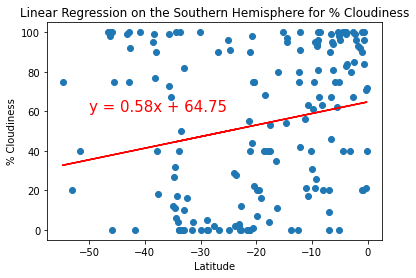

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))
plt.savefig("weather_data/cloud_south.png")

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.213


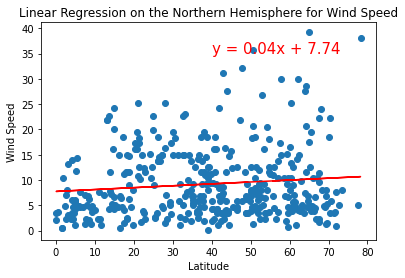

<Figure size 432x288 with 0 Axes>

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))
plt.savefig("weather_data/wind_north.png")

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.108


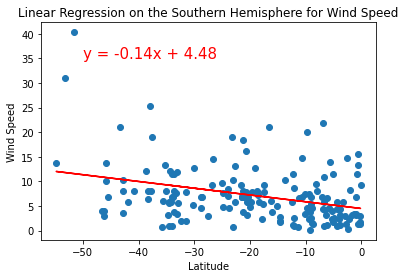

<Figure size 432x288 with 0 Axes>

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
plt.savefig("weather_data/wind_south.png")

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.334
